In [47]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os

In [28]:
base_dir = "/scratch/data/panel13"
crops_dir = base_dir + "/crops1"
image = imageio.imread(base_dir + "/clean.tif")
mask = imageio.imread(base_dir + "/pred.png")

In [29]:
image.shape

(1945, 1218, 3)

In [30]:
1945/5

389.0

In [31]:
1218/3

406.0

In [24]:
crop_height = image.shape[0] // 5
crop_width = image.shape[1] // 3

for i in range(0, image.shape[0], crop_height):
    for j in range(0, image.shape[1], crop_width):
        image_crop = image[i: i + crop_height, j: j + crop_width, :]
        mask_crop = mask[i: i + crop_height, j: j + crop_width]
        imageio.imwrite(crops_dir + "/image_" + str(i) + "_" + str(j) + ".tif", image_crop)
        imageio.imwrite(crops_dir + "/mask_" + str(i) + "_" + str(j) + ".png", mask_crop)
    

In [32]:
additional_border = 8
crop_height = image.shape[0] // 5
crop_width = image.shape[1] // 3

for h in range(0, image.shape[0], crop_height):
    for w in range(0, image.shape[1], crop_width):

        h_start = max(0, h - additional_border)
        h_end   = min(image.shape[0], h + crop_height + additional_border)
        
        w_start = max(0, w - additional_border)
        w_end   = min(image.shape[1], w + crop_width + additional_border)
        
        image_crop = image[h_start: h_end, w_start: w_end, :]
        mask_crop = mask[h_start: h_end, w_start: w_end]
        imageio.imwrite(crops_dir + "/image_" + str(h) + "_" + str(w) + ".tif", image_crop)
        imageio.imwrite(crops_dir + "/mask_" + str(h) + "_" + str(w) + ".png", mask_crop)


In [68]:
image_reconstructed = np.zeros(image.shape, dtype=np.uint8)

In [44]:
puttogether_dir = crops_dir + "/puttogether"
file_names = os.listdir(puttogether_dir)
file_names.sort()

In [45]:
file_names

['image_0_0_20190904_143156_16_8_6755360_10_10_descr_stored.jpg',
 'image_0_406_20190904_152322_16_8_6755360_10_10_descr_stored.jpg',
 'image_0_812_20190904_155616_16_8_6755360_10_10_descr_stored.jpg',
 'image_1167_0_20190904_215820_16_8_6755360_10_10_descr_stored.jpg',
 'image_1167_406_20190904_225712_16_8_6755360_10_10_descr_stored.jpg',
 'image_1167_812_20190904_235547_16_8_6755360_10_10_descr_stored.jpg',
 'image_1556_0_20190905_005106_16_8_6755360_10_10_descr_stored.jpg',
 'image_1556_406_20190905_012251_16_8_6755360_10_10_descr_stored.jpg',
 'image_1556_812_20190905_022214_16_8_6755360_10_10_descr_stored.jpg',
 'image_389_0_20190904_164235_16_8_6755360_10_10_descr_stored.jpg',
 'image_389_406_20190904_172931_16_8_6755360_10_10_descr_stored.jpg',
 'image_389_812_20190904_182105_16_8_6755360_10_10_descr_stored.jpg',
 'image_778_0_20190904_190912_16_8_6755360_10_10_descr_stored.jpg',
 'image_778_406_20190904_200440_16_8_6755360_10_10_descr_stored.jpg',
 'image_778_812_20190904_21053

In [74]:
counter = 0

for file_name in file_names:
    h = int(file_name.split('_')[1])
    w = int(file_name.split('_')[2])
    
    if counter < 4:
        crop_h_start = 0
    else:
        crop_h_start = 0 + additional_border
    crop_h_end = crop_h_start + crop_height
    
    if counter % 3 == 0:
        crop_w_start = 0
    else:
        crop_w_start = 0 + additional_border
    crop_w_end = crop_w_start + crop_width
    
    image_crop = imageio.imread(crops_dir + "/" + file_name)
    
#     print(crop_h_start, crop_w_start)
    image_reconstructed[h: h + crop_height, w: w + crop_width, :] = image_crop[crop_h_start: crop_h_end, crop_w_start: crop_w_end, :]
    
    counter += 1

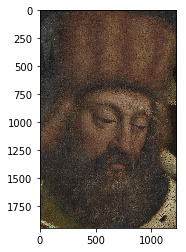

In [75]:
plt.imshow(image_reconstructed)

In [76]:
imageio.imwrite(base_dir + "/clean_inpainted.jpg", image_reconstructed)